# Global cluster structure of variables

Variables are often redundant or dependent. Here we used hierarchical clustering to identify clusters of variables based on MI distance between variables from all subjects/samples.

In [1]:
import pandas as pd
import seaborn as sns
from pylab import *

%reload_ext version_information
%version_information numpy, pandas, seaborn

Software versions
Python 2.7.12 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 2.6.32 431.3.1.el6.x86_64 x86_64 with centos 6.8 Final
numpy 1.11.2
pandas 0.19.1
seaborn 0.7.1
Fri Dec 30 11:23:22 2016 EST

# Setup

In [18]:
# Input
FILE1 = "../reports/Global_MI_btw_covariates.unnormalized.tsv"  # unnormalized MI
FILE2 = "../reports/Global_MI_btw_covariates.tsv"  # normalized MI
SUBJ_VAR_LIST = "../../../src/GTEx/meta/subj_var_list.selected.tsv"
SAMP_VAR_LIST = "../../../src/GTEx/meta/samp_var_list.selected.tsv"

# Output
# A series of clustermap plots at ../plots/Global_MI_btw_covariates.[average/complete/single].pdf & .labels
# Also, "../plots/Global_MI_btw_covariates.unnormalized.pdf", based on unnormalized MI

# Load variable metadata

In [3]:
subj_var = pd.read_table(SUBJ_VAR_LIST, index_col=0)  # a dataframe (name -> description, type)
samp_var = pd.read_table(SAMP_VAR_LIST, index_col=0)  # a dataframe (name -> description, type)
meta_var = pd.concat([subj_var, samp_var])

In [22]:
meta_var.head()

,description,type
name,,
SUBJID,"Subject ID, GTEx Public Donor ID",string
COHORT,Cohort,string
GENDER,Gender,"integer, encoded value"
AGE,Age,integer
RACE,Race,"integer, encoded value"


In [56]:
meta_var.loc['DTHWTNS'].description

'Witnessed Death'

# Load MI matrix

In [19]:
df1 = pd.read_table(FILE1, index_col=0)
df2 = pd.read_table(FILE2, index_col=0)

In [20]:
df1.head()

,AGE,BMI,COHORT,DTHATPSY,DTHCAT,DTHCERT,DTHCLS,DTHCOD,DTHFUCOD,DTHHRDY,...,SMTSD,SMTSTPTREF,SMUBRID,SMUNMPRT,SMVQCFL,SUBJID,TRCHSTIND,TRDNISCH,TRISCHD,WGHT
AGE,3.704111,3.291261,0.124849,0.173189,0.702037,0.098315,0.678478,1.690353,2.230373,0.285879,...,0.000000,0.033049,0.000000,0.006469,0.059010,3.828857,3.292235,2.870631,3.201327,2.523278
BMI,3.291261,5.810288,0.602538,0.756083,2.028684,0.583691,1.990503,3.463113,4.114068,1.018359,...,0.000000,0.146881,0.000000,0.000000,0.106625,5.873793,5.379308,4.895474,5.264660,4.787474
COHORT,0.124849,0.602538,0.732971,0.201717,0.262002,0.312119,0.265653,0.608582,0.572782,0.447539,...,0.156310,0.060146,0.156310,0.012074,0.005117,0.732971,0.719124,0.676449,0.693882,0.351106
DTHATPSY,0.173189,0.756083,0.201717,0.981230,0.232612,0.276929,0.225110,0.607713,0.677628,0.147333,...,0.039907,0.024831,0.039842,0.006572,0.010753,0.981230,0.818278,0.742413,0.782998,0.426279
DTHCAT,0.702037,2.028684,0.262002,0.232612,2.375155,0.179410,2.217380,2.008072,2.142119,0.517822,...,0.131321,0.072352,0.130998,0.001179,0.052410,2.375155,2.092248,1.855815,1.998945,1.474515


In [21]:
df2.head()

,AGE,BMI,COHORT,DTHATPSY,DTHCAT,DTHCERT,DTHCLS,DTHCOD,DTHFUCOD,DTHHRDY,...,SMTSD,SMTSTPTREF,SMUBRID,SMUNMPRT,SMVQCFL,SUBJID,TRCHSTIND,TRDNISCH,TRISCHD,WGHT
AGE,1.000000,0.709449,0.075771,0.090843,0.236686,0.058869,0.230992,0.447947,0.545408,0.132176,...,0.000000,0.035971,0.000000,0.001204,0.010982,0.798142,0.709547,0.645653,0.695604,0.587899
BMI,0.709449,1.000000,0.291973,0.316654,0.546097,0.279059,0.541088,0.732755,0.803264,0.375936,...,0.000000,0.127648,0.000000,0.000000,0.015844,0.977627,0.925677,0.879144,0.913367,0.890609
COHORT,0.075771,0.291973,1.000000,0.237856,0.198571,0.420135,0.203318,0.362549,0.314870,0.465157,...,0.094406,0.147167,0.094642,0.005051,0.002141,0.343476,0.348412,0.342023,0.338935,0.183897
DTHATPSY,0.090843,0.316654,0.237856,1.000000,0.152371,0.322177,0.148907,0.312899,0.321952,0.132351,...,0.020832,0.052512,0.020850,0.002376,0.003888,0.397410,0.342648,0.324433,0.330559,0.192969
DTHCAT,0.236686,0.546097,0.198571,0.152371,1.000000,0.134157,0.942754,0.664545,0.654159,0.298983,...,0.044060,0.098345,0.044062,0.000274,0.012181,0.618300,0.563118,0.521258,0.542411,0.429025


# Clustermaps

In [52]:
def draw_clustermap(df, method='average', savefig=None):
    sns.set(font_scale=0.3, style='white')

    cg = sns.clustermap(df, method=method)
    xaxis = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
    yaxis = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    
    if savefig:
        plt.savefig(savefig)
        variables = [i.get_text() for i in cg.ax_heatmap.yaxis.get_majorticklabels()[::-1]]
        meta_var.loc[variables].to_csv(savefig + ".labels.tsv", sep="\t")

    return cg

## Unnormalized MI clusters

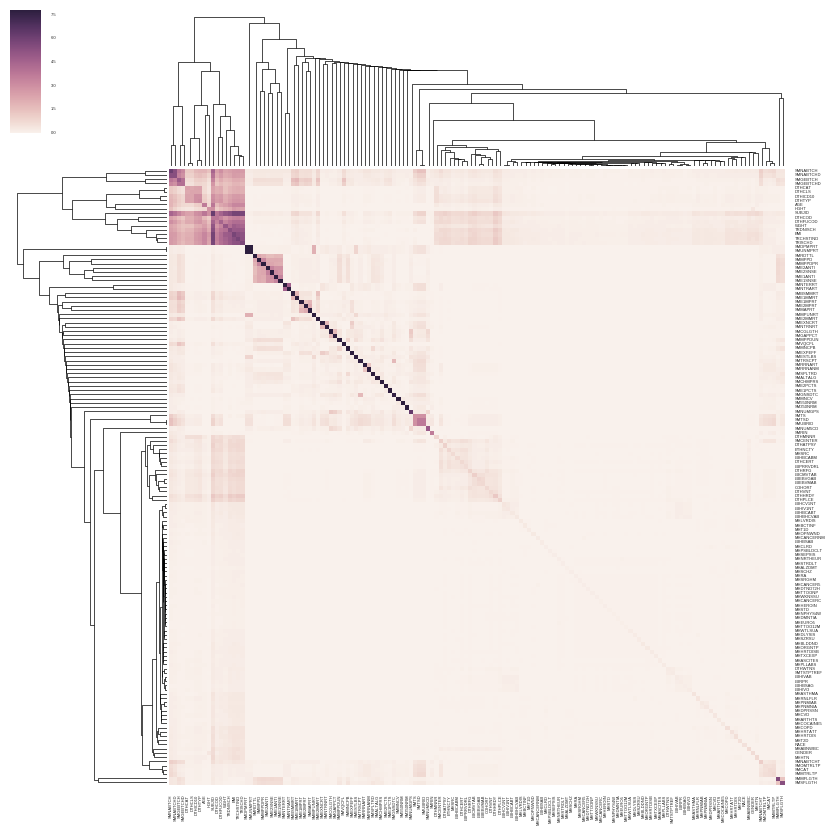

In [34]:
cg1 = draw_clustermap(df1, savefig="../plots/Global_MI_btw_covariates.unnormalized.pdf")

## Normalized MI clusters

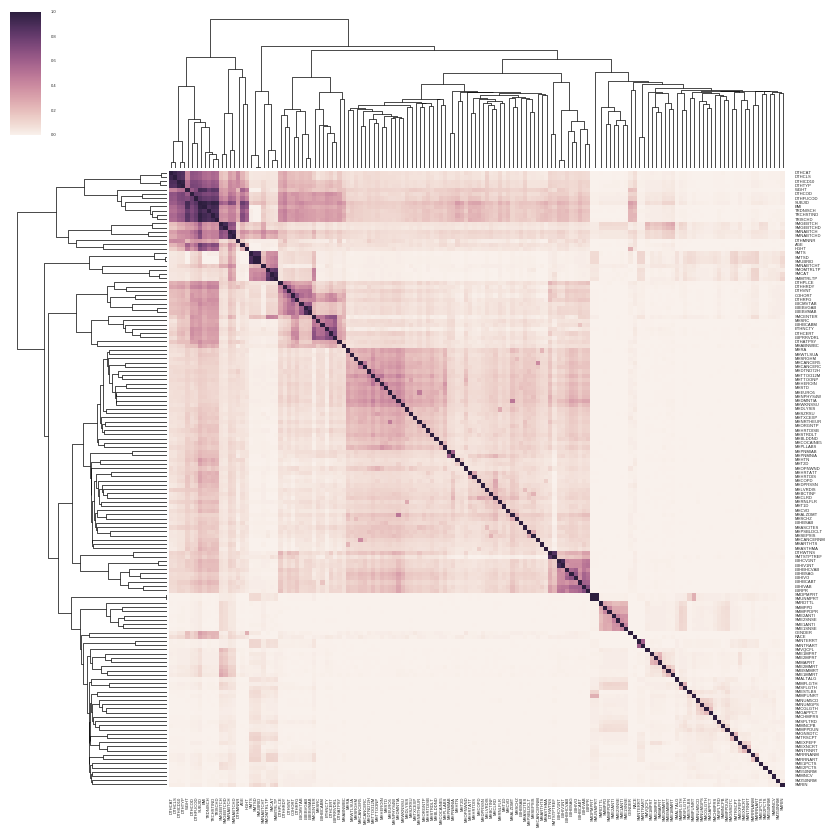

In [53]:
cg2 = draw_clustermap(df2, method='average', savefig="../plots/Global_MI_btw_covariates.average.pdf")

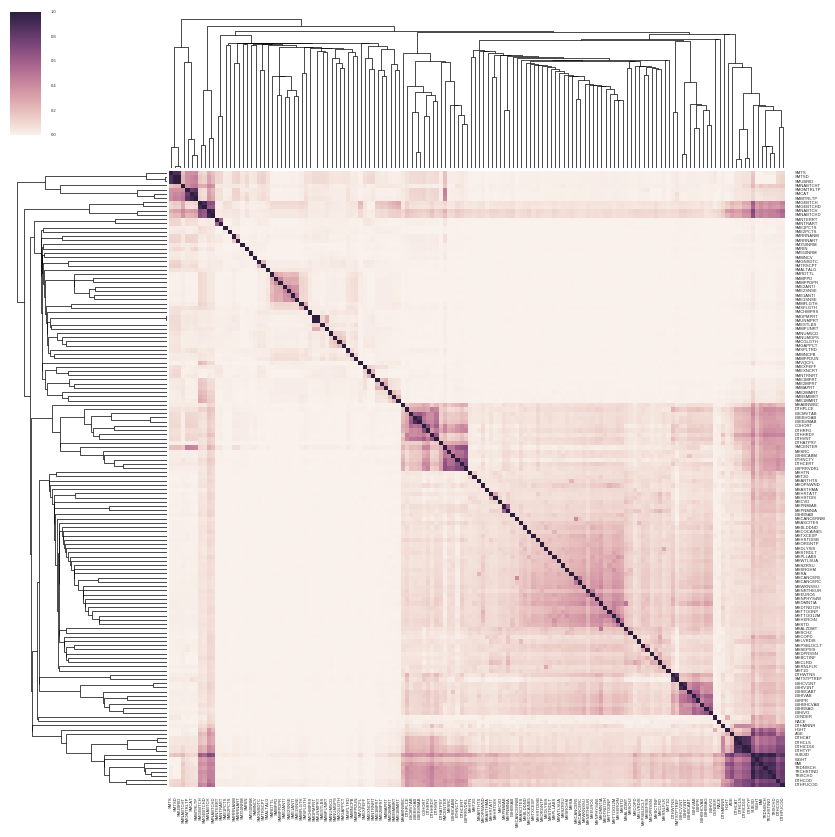

In [54]:
cg2 = draw_clustermap(df2, method='single', savefig="../plots/Global_MI_btw_covariates.single.pdf")

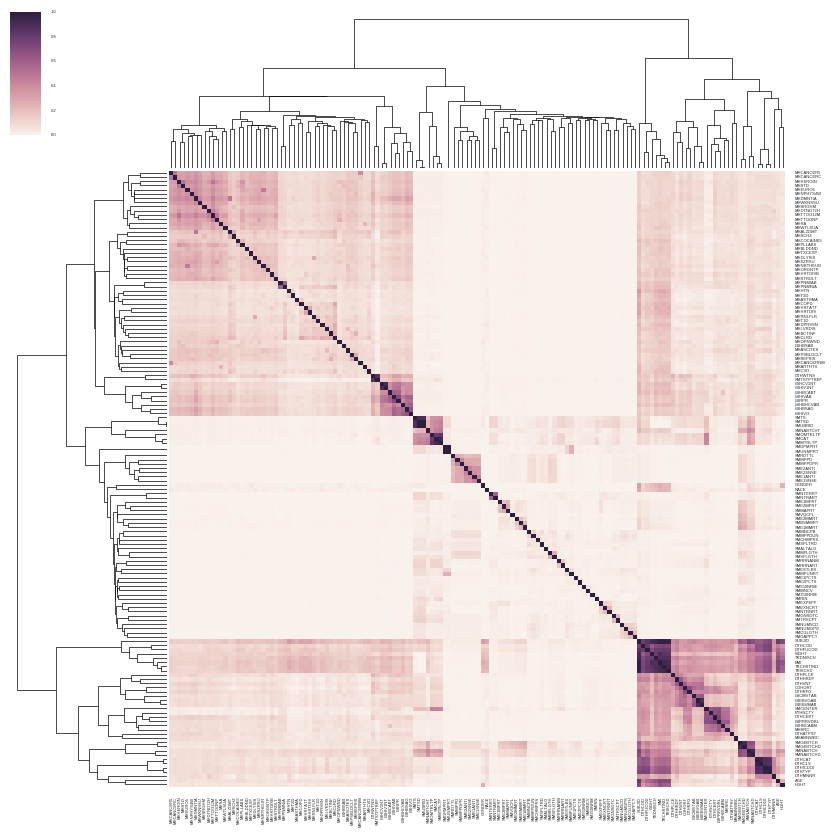

In [55]:
cg2 = draw_clustermap(df2, method='complete', savefig="../plots/Global_MI_btw_covariates.complete.pdf")